In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

/Users/robert/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def change_Ht_to_int(input):
    if (isinstance(input, str)):
        feet, inches = input.split('-')
        return (int(feet) * 12) + int(inches)
    else:
        return np.nan

In [3]:
dfs = []

years = [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000]

for year in years:
    path = f'../data/{year}_combine.csv'
    df_year = pd.read_csv(path)
    dfs.append(df_year)

df = pd.concat(dfs, ignore_index=True)

print(df.head(10))

               Player  Pos       School        College    Ht     Wt  40yd  \
0  Kris Abrams-Draine   CB     Missouri  College Stats  5-11  179.0  4.44   
1        Isaiah Adams    G     Illinois  College Stats   6-4  315.0  5.22   
2         Rasheen Ali   RB     Marshall  College Stats  5-11  206.0   NaN   
3           Erick All   TE         Iowa  College Stats   6-4  252.0   NaN   
4       Braelon Allen   RB    Wisconsin  College Stats   6-1  235.0   NaN   
5             Joe Alt   OT   Notre Dame  College Stats   6-9  321.0  5.05   
6     Kiran Amegadjie   OT         Yale            NaN   6-5  323.0   NaN   
7     Daijahn Anthony  SAF  Mississippi  College Stats   6-0  195.0  4.55   
8      Terrion Arnold   CB      Alabama  College Stats   6-0  189.0  4.50   
9     Gottlieb Ayedze    G     Maryland  College Stats   6-4  308.0  5.01   

   Vertical  Bench  Broad Jump  3Cone  Shuttle  \
0      33.5    NaN         NaN    NaN      NaN   
1      24.5    NaN       102.0   7.77     4.73   
2 

In [4]:
df['Drafted'] = df['Drafted (tm/rnd/yr)'].notna().astype(int)
df = df[df['Pos'] == 'QB']
df['Ht'] = df['Ht'].apply(change_Ht_to_int)
print(df.head(10))

                Player Pos          School        College    Ht     Wt  40yd  \
56      Jayden Daniels  QB             LSU  College Stats  76.0  210.0   NaN   
112        Sam Hartman  QB      Notre Dame  College Stats  73.0  211.0  4.80   
147  Michael Penix Jr.  QB      Washington  College Stats  74.0  216.0   NaN   
167        Devin Leary  QB        Kentucky  College Stats  73.0  215.0   NaN   
179         Drake Maye  QB  North Carolina  College Stats  76.0  223.0   NaN   
181      J.J. McCarthy  QB        Michigan  College Stats  75.0  219.0   NaN   
195         Joe Milton  QB       Tennessee  College Stats  77.0  235.0   NaN   
209             Bo Nix  QB          Oregon  College Stats  74.0  214.0   NaN   
227      Michael Pratt  QB          Tulane  College Stats  75.0  217.0   NaN   
233    Spencer Rattler  QB  South Carolina  College Stats  72.0  211.0  4.95   

     Vertical  Bench  Broad Jump  3Cone  Shuttle  \
56        NaN    NaN         NaN    NaN      NaN   
112      28.5  

In [5]:
print(df.columns)

Index(['Player', 'Pos', 'School', 'College', 'Ht', 'Wt', '40yd', 'Vertical',
       'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)',
       'Player-additional', 'Drafted'],
      dtype='object')


In [6]:
X = df.drop(['Drafted', 'Player', 'Pos', 'School', 'College', 'Drafted (tm/rnd/yr)', 'Player-additional'], axis=1)
y = df['Drafted']

In [7]:
imputer = KNNImputer(n_neighbors=5)

X_imputed = imputer.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5777777777777777


In [13]:
print(X.columns)

Index(['Ht', 'Wt', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone',
       'Shuttle'],
      dtype='object')


In [14]:
df.shape

(446, 15)

In [15]:
k_values = [i for i in range (1, 30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

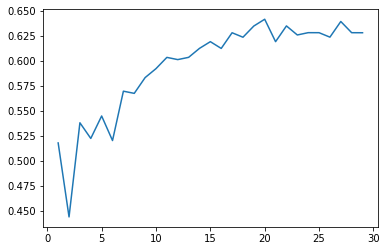

In [16]:
plt.plot(k_values, scores)

In [17]:
index_of_largest_score = np.argmax(scores)
print(str(k_values[index_of_largest_score]) + " " + str(scores[index_of_largest_score]))

20 0.6413233458177279


In [18]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6222222222222222
